# Fabryka modeli 1.0 [Stroke_Prediction.csv]

### <span style="color:blue"> Cognition comes by comparison! Friedrich Wilhelm Nietzsche

In [1]:
def email(file, name):

    from email.mime.text import MIMEText
    from email.mime.multipart import MIMEMultipart
    import smtplib
    import mimetypes
    import email.mime.application

    smtp_ssl_host = 'smtp.gmail.com'  # smtp.mail.yahoo.com
    smtp_ssl_port = 465
    s = smtplib.SMTP_SSL(smtp_ssl_host, smtp_ssl_port)
    s.login('wtm695450085@gmail.com', 'Ewa183311')


    msg = MIMEMultipart()
    msg['Subject'] = file
    msg['From'] = 'wtm695450085@gmail.com'
    msg['To'] = 'wtm695450085@gmail.com'

    txt = MIMEText(name)
    msg.attach(txt)

    filename = file #path to file
    fo=open(filename,'rb')
    attach = email.mime.application.MIMEApplication(fo.read(),_subtype="pdf")
    fo.close()
    attach.add_header('Content-Disposition','attachment',filename=filename)
    msg.attach(attach)
    s.send_message(msg)
    s.quit()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.ensemble import BaggingClassifier
from simple_colors import * 
from prettytable import PrettyTable

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/1/Stroke_Prediction.csv')
print(df.shape)
print()
print(df.columns)
df.head(3)

(43400, 12)

Index(['ID', 'Gender', 'Age_In_Days', 'Hypertension', 'Heart_Disease',
       'Ever_Married', 'Type_Of_Work', 'Residence', 'Avg_Glucose', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')


,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


#### <div class="alert-success">Sample reduction:</div>

In [3]:
df = df.sample(frac = 0.35, random_state=148) 
df.shape

(15190, 12)

#### Start pomiaru czasu

In [4]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Fri Jun 12 08:41:22 2020


### Tool for automatic coding of discrete variables !

In [5]:
a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Gender --- object
Ever_Married --- object
Type_Of_Work --- object
Residence --- object
Smoking_Status --- object


In [6]:
df.fillna(7777, inplace=True)

In [7]:
X = df.drop('Stroke', axis=1) 
y = df['Stroke']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

# <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">Oversampling !! 

In [8]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
    
    global Xtrain_OV
    global ytrain_OV

    calss1 = np.round((sum(ytrain == 1)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    calss0 = np.round((sum(ytrain == 0)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    
    print("y = 0: ", sum(ytrain == 0),'-------',calss0,'%')
    print("y = 1: ", sum(ytrain == 1),'-------',calss1,'%')
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1)
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
       
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    Xtrain_OV = pd.DataFrame(Xtrain_OV)
    ytrain_OV = pd.DataFrame(ytrain_OV)
    

    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
    
    
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    
       
    kot = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0)
    kot = pd.concat([ytrain, kot], axis = 0).reset_index(drop = True)
    ax = plt.subplot(1, 2, 2)
    kot.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show

y = 0:  11912 ------- 98.0 %
y = 1:  240 ------- 2.0 %
--------------------------------------------------------

Before oversampling Xtrain:      (12152, 11)
Before oversampling ytrain:      (12152,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (24152, 11)
After oversampling ytrain_OV:   (24152, 1)
--------------------------------------------------------


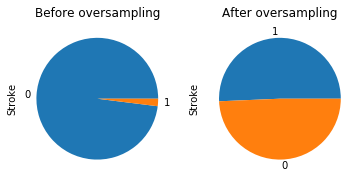

In [9]:
oversampling(y_train, X_train)

I used six models of GaussianNB, LogisticRegression, CatBoostClassifier in their basic version without oversamplin and with oversampling. We will see what differences in the minority set classification the oversampling method gives.!!

I get rid of one dimension from the ytrain_OV set so that the set is similar to y_test.

In [10]:
print(Xtrain_OV.shape)
print(ytrain_OV.shape)
ytrain_OV = ytrain_OV['Stroke']
print(ytrain_OV.shape)

(24152, 11)
(24152, 1)
(24152,)


W poprzednim wpisie uznaliśmy, że oversampling poprawiło jakość klasyfikacji. Kolejne działania będą opierały sie na danych zbilansowanych przez oversampling. Dlatego teraz podmieniamy zwykłą próbę na próbę po oversamoling.

In [11]:
X_train = Xtrain_OV
y_train = ytrain_OV
print(X_train.shape)
print(y_train.shape)

(24152, 11)
(24152,)


## <span style="color:blue">Oversampling dla cross-validation

<span style="color:blue">Teraz robimy oversampling dla wartości testowych. Robimy tak ponieważ bedziemy robić oversampling, gdzie podział na zbiór testowy i treningowy jest robiony wielokrotnie (fałdy). Więc do równania oversampling wstawiamy połaczomy zbiór testowy i wynikowy. A warto żeby oba te zbiory były zbilansowane przez oversampling.  

In [12]:
X = df.drop('Stroke', axis=1) 
y = df['Stroke']  

In [13]:
X.shape

(15190, 11)

y = 0:  14890 ------- 98.0 %
y = 1:  300 ------- 2.0 %
--------------------------------------------------------

Before oversampling Xtrain:      (15190, 11)
Before oversampling ytrain:      (15190,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (30190, 11)
After oversampling ytrain_OV:   (30190, 1)
--------------------------------------------------------


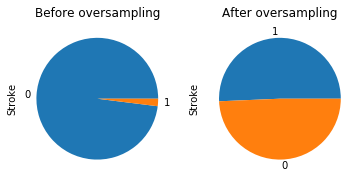

In [14]:
oversampling(y, X)

In [15]:
Data = Xtrain_OV
target = ytrain_OV
print("output:",Data.shape)
print("output:",target.shape)
print('----------')
print("input:", df.shape)

output: (30190, 11)
output: (30190, 1)
----------
input: (15190, 12)


# Ścieżka do modeli:
### oznakowanie modeli

model1 - modele na ustawieniach fabrycznych

        classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
        nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

model2 - modele na ustawieniach fabrycznych po bagging

        classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
        nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
        
model3 - modele na ustawieniach fabrycznych po kalibracji     

model4 -  modele na ustawieniach fabrycznych po bagging po kalibracji

model5 - modele po cross-validation

        classifiers_F = [gs_SVM,gs_SVM2,gs_XGB,gs_LGBM,gs_KNN,gs_NBC,gs_LRE,gs_RFC,gs_RFC2]
        nameF = ['gs_SVM','gs_SVM2','gs_XGB','gs_LGBM','gs_KNN','gs_NBC','gs_LRE','gs_RFC','gs_RFC2']
        
model6 - modele po cross-validation po bagging 

model7 - modele na ustawieniach optymalnych

In [16]:
address1 ='/home/wojciech/Pulpit/7/model1-{0}.pkl'  #<=  modele na ustawieniach fabrycznych
address2 ='/home/wojciech/Pulpit/7/model2-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging
address3 ='/home/wojciech/Pulpit/7/model3-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po kalibracji
address4 ='/home/wojciech/Pulpit/7/model4-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging po kalibracji
address5 ='/home/wojciech/Pulpit/7/model5-{0}.pkl'  #<=  modele na cross-validation
address6 ='/home/wojciech/Pulpit/7/model6-{0}.pkl'  #<=  modele na ustawieniach optymalnych po bagging
address7 ='/home/wojciech/Pulpit/7/model7-{0}.pkl'  ##<=  modele na ustawieniach optymalnych 
address8 ='/home/wojciech/Pulpit/7/model8-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po boosting n=3
address9 ='/home/wojciech/Pulpit/7/model9-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po boosting n=10
address10 ='/home/wojciech/Pulpit/7/model10-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='isotonic')
address11 ='/home/wojciech/Pulpit/7/model11-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

### <span style="font-size: 110%;color:white;background:Red">Model 1 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych
### <span style="font-size: 110%;color:white;background:Red">Model 2  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging 


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import joblib
import time

NBC = GaussianNB()
LRE = LogisticRegression(solver='lbfgs')
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LGBM = LGBMClassifier() 
CBC = CatBoostClassifier(verbose=0, n_estimators=100)
XGB = XGBClassifier()
LREN = LogisticRegression(solver='newton-cg')
KNN = KNeighborsClassifier(n_neighbors=1, p=2)
SVM = SVC(probability=True) 

print()
print('----Models without settings-----------------------------')
print()

classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

for n,t in zip(nameA,classifiers_A):          ## Szkolenie modeli w pętli
    start_time = time.time()
    t.fit(X_train, y_train)
    filename1 =address1.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename1, compress=9)
    #email(filename1,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())


### Wzmacnianie przez bagowanie!

NBC_b = BaggingClassifier(base_estimator=NBC, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_b = BaggingClassifier(base_estimator=LRE, n_estimators=10, max_samples=0.8, max_features=0.8)
GBC_b = BaggingClassifier(base_estimator=GBC, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_b = BaggingClassifier(base_estimator=RFC, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_b = BaggingClassifier(base_estimator=LGBM, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_b = BaggingClassifier(base_estimator=CBC, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_b = BaggingClassifier(base_estimator=XGB, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM_b = BaggingClassifier(base_estimator=SVM, n_estimators=10, max_samples=0.8, max_features=0.8)
KNN_b = BaggingClassifier(base_estimator=KNN, n_estimators=10, max_samples=0.8, max_features=0.8)

nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
print()
print('----Models without settings after bagging------------------')
print()
for n,t in zip(nameB,classifiers_B):
    start_time = time.time()
    #BaggingClassifier(base_estimator=t, n_estimators=10, max_samples=0.8, max_features=0.8) 
    t.fit(X_train, y_train)
    filename2 =address2.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename2, compress=9) 
    #email(filename2,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())
    


----Models without settings-----------------------------

SVM 121.1 --- Fri Jun 12 08:43:24 2020
CBC 0.7 --- Fri Jun 12 08:43:25 2020
XGB 1.0 --- Fri Jun 12 08:43:26 2020
LGBM 0.4 --- Fri Jun 12 08:43:26 2020
KNN 1.0 --- Fri Jun 12 08:43:27 2020
NBC 0.0 --- Fri Jun 12 08:43:27 2020
LRE 0.1 --- Fri Jun 12 08:43:28 2020
RFC 5.6 --- Fri Jun 12 08:43:33 2020
GBC 3.7 --- Fri Jun 12 08:43:37 2020

----Models without settings after bagging------------------

SVM_b 355.9 --- Fri Jun 12 08:49:33 2020
CBC_b 14.1 --- Fri Jun 12 08:49:47 2020
XGB_b 15.1 --- Fri Jun 12 08:50:02 2020
LGBM_b 13.3 --- Fri Jun 12 08:50:15 2020
KNN_b 11.5 --- Fri Jun 12 08:50:27 2020
NBC_b 0.1 --- Fri Jun 12 08:50:27 2020
LRE_b 1.3 --- Fri Jun 12 08:50:28 2020
RFC_b 45.2 --- Fri Jun 12 08:51:13 2020
GBC_b 19.6 --- Fri Jun 12 08:51:33 2020


In [18]:
stop

NameError: name 'stop' is not defined

### <span style="font-size: 110%;color:white;background:Red">Model 3  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po kalibracji

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_c = CalibratedClassifierCV(SVM, method='sigmoid', cv=5)
CBC_c = CalibratedClassifierCV(CBC, method='sigmoid', cv=5)
XGB_c = CalibratedClassifierCV(XGB, method='sigmoid', cv=5)
LGBM_c = CalibratedClassifierCV(LGBM, method='sigmoid', cv=5)
KNN_c = CalibratedClassifierCV(KNN, method='sigmoid', cv=5)
NBC_c = CalibratedClassifierCV(NBC, method='sigmoid', cv=5)
LRE_c = CalibratedClassifierCV(LRE, method='sigmoid', cv=5)
RFC_c = CalibratedClassifierCV(RFC, method='sigmoid', cv=5)
GBC_c = CalibratedClassifierCV(GBC, method='sigmoid', cv=5)

classifiers_3 = [SVM_c,CBC_c,XGB_c,LGBM_c,KNN_c,NBC_c,LRE_c,RFC_c,GBC_c]
name3 = ['SVM_c','CBC_c','XGB_c','LGBM_c','KNN_c','NBC_c','LRE_c','RFC_c','GBC_c']

for n,t in zip(name3,classifiers_3):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename3 =address3.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename3, compress=9)
    email(filename3,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

### <span style="font-size: 110%;color:white;background:Red">Model 4  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging i po kalibracji

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_d = CalibratedClassifierCV(SVM_c, method='sigmoid', cv=5)
CBC_d = CalibratedClassifierCV(CBC_c, method='sigmoid', cv=5)
XGB_d = CalibratedClassifierCV(XGB_c, method='sigmoid', cv=5)
LGBM_d = CalibratedClassifierCV(LGBM_c, method='sigmoid', cv=5)
KNN_d = CalibratedClassifierCV(KNN_c, method='sigmoid', cv=5)
NBC_d = CalibratedClassifierCV(NBC_c, method='sigmoid', cv=5)
LRE_d = CalibratedClassifierCV(LRE_c, method='sigmoid', cv=5)
RFC_d = CalibratedClassifierCV(RFC_c, method='sigmoid', cv=5)
GBC_d = CalibratedClassifierCV(GBC_c, method='sigmoid', cv=5)

classifiers_4 = [SVM_d,CBC_d,XGB_d,LGBM_d,KNN_d,NBC_d,LRE_d,RFC_d,GBC_d]
name4 = ['SVM_d','CBC_d','XGB_d','LGBM_d','KNN_d','NBC_d','LRE_d','RFC_d','GBC_d']

for n,t in zip(name4,classifiers_4):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename4 =address4.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename4, compress=9)
    #email(filename4,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

### <span style="font-size: 110%;color:white;background:Red">Model 5  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na cross-validation

### <span style="color:blue">Zbiór hiperparametrów dla każdego modelu:

### <span style="color:blue">Wstawienie każdego modelu do sietki grid:

### <span style="color:blue">Ćwiczenie modelu z użyciem pełnego zakresu danych zbilansowanych (po oversample):

### <span style="color:blue">Sprawdzenie najlepszego zestawu hiperparametrów:

### <span style="font-size: 110%;color:white;background:Red">Model 7 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych

In [20]:
SVM_o = SVC(C= 0.1, gamma= 1, kernel= 'rbf', probability=True)
SVM2_o = SVC(C= 10, kernel= 'poly', probability=True)
CBC_o = CatBoostClassifier(verbose=0, n_estimators=100)
XGB_o = XGBClassifier(gamma= 0.0, learning_rate= 0.05, max_depth= 6)
LGBM_o = LogisticRegression(solver='newton-cg')
NBC_o = GaussianNB(var_smoothing= 1e-09)
LRE_o = LogisticRegression(solver='lbfgs',C= 1.0)
RFC_o = RandomForestClassifier(max_depth= 5, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
RFC2_o = RandomForestClassifier(max_depth= 3, min_samples_leaf= 3, n_estimators= 500)

In [21]:
classifiers_O = [SVM_o,SVM2_o,CBC_o,XGB_o,LGBM_o,NBC_o,LRE_o,RFC_o,RFC2_o]
nameO = ['SVM_o','SVM2_o','CBC_o','XGB_o','LGBM_o','NBC_o','LRE_o','RFC_o','RFC2_o']

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

for n,t in zip(nameO,classifiers_O):          ## Szkolenie modeli w pętli
    start_time = time.time() 
    t.fit(X_train, y_train)
    filename7 =address7.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename7, compress=9)
    email(filename7,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())


### <span style="font-size: 110%;color:white;background:Red">Model 8 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po boosting, n=3

In [22]:
from sklearn.ensemble import AdaBoostClassifier

SVM_v = AdaBoostClassifier(base_estimator=SVM_o,n_estimators=3) 
SVM2_v = AdaBoostClassifier(base_estimator=SVM2_o,n_estimators=3)
CBC_v = AdaBoostClassifier(base_estimator=CBC_o,n_estimators=3)
XGB_v = AdaBoostClassifier(base_estimator=XGB_o,n_estimators=3)
LGBM_v = AdaBoostClassifier(base_estimator=LGBM_o,n_estimators=3)
NBC_v = AdaBoostClassifier(base_estimator=NBC_o,n_estimators=3)
LRE_v = AdaBoostClassifier(base_estimator=LRE_o,n_estimators=3)
RFC_v = AdaBoostClassifier(base_estimator=RFC_o,n_estimators=3)
RFC2_v = AdaBoostClassifier(base_estimator=RFC2_o,n_estimators=3)

classifiers_8 = [SVM_v,SVM2_v,CBC_v,XGB_v,LGBM_v,NBC_v,LRE_v,RFC_v,RFC2_v]
name8 = ['SVM_v','SVM2_v','CBC_v','XGB_v','LGBM_v','NBC_v','LRE_v','RFC_v','RFC2_v']

for t,n in zip(classifiers_8,name8):   
        start_time = time.time() 
        t.fit(X_train, y_train)   
        filename8 =address8.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename8, compress=9) 
        #email(filename8,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())


SVM_v 448.0 --- Fri Jun 12 08:59:37 2020
SVM2_v 422.6 --- Fri Jun 12 09:06:40 2020
CBC_v 4.2 --- Fri Jun 12 09:06:44 2020
XGB_v 1.3 --- Fri Jun 12 09:06:45 2020
LGBM_v 3.4 --- Fri Jun 12 09:06:48 2020
NBC_v 0.1 --- Fri Jun 12 09:06:48 2020
LRE_v 0.5 --- Fri Jun 12 09:06:49 2020
RFC_v 5.1 --- Fri Jun 12 09:06:54 2020
RFC2_v 19.1 --- Fri Jun 12 09:07:13 2020


### <span style="font-size: 110%;color:white;background:Red">Model 9 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po boosting, n=10

In [24]:

from sklearn.ensemble import AdaBoostClassifier

SVM_s = AdaBoostClassifier(base_estimator=SVM_o,n_estimators=10) 
SVM2_s = AdaBoostClassifier(base_estimator=SVM2_o,n_estimators=10)
CBC_s = AdaBoostClassifier(base_estimator=CBC_o,n_estimators=10)
XGB_s = AdaBoostClassifier(base_estimator=XGB_o,n_estimators=10)
LGBM_s = AdaBoostClassifier(base_estimator=LGBM_o,n_estimators=10)
NBC_s = AdaBoostClassifier(base_estimator=NBC_o,n_estimators=10)
LRE_s = AdaBoostClassifier(base_estimator=LRE_o,n_estimators=10)
RFC_s = AdaBoostClassifier(base_estimator=RFC_o,n_estimators=10)
RFC2_s = AdaBoostClassifier(base_estimator=RFC2_o,n_estimators=10)

classifiers_9 = [SVM_s,SVM2_s,CBC_s,XGB_s,LGBM_s,NBC_s,LRE_s,RFC_s,RFC2_s]
name9 = ['SVM_s','SVM2_s','CBC_s','XGB_s','LGBM_s','NBC_s','LRE_s','RFC_s','RFC2_s']


for t,n in zip(classifiers_9,name9):
        start_time = time.time() 
        t.fit(X_train, y_train)   
        filename9 =address9.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename9, compress=9)
        email(filename9,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())

SVM_s 439.3 --- Fri Jun 12 10:16:34 2020
SVM2_s 1448.5 --- Fri Jun 12 10:40:43 2020
CBC_s 9.8 --- Fri Jun 12 10:40:52 2020
XGB_s 4.1 --- Fri Jun 12 10:40:57 2020
LGBM_s 7.1 --- Fri Jun 12 10:41:04 2020
NBC_s 1.9 --- Fri Jun 12 10:41:06 2020
LRE_s 2.6 --- Fri Jun 12 10:41:08 2020
RFC_s 23.3 --- Fri Jun 12 10:41:31 2020
RFC2_s 72.1 --- Fri Jun 12 10:42:44 2020


### <span style="font-size: 110%;color:white;background:Red">Model 6 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3"> Modele na ustawieniach optymalnych po bagging

In [ ]:

SVM_w = BaggingClassifier(base_estimator=SVM_o, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM2_w = BaggingClassifier(base_estimator=SVM2_o, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_w = BaggingClassifier(base_estimator=CBC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_w = BaggingClassifier(base_estimator=XGB_o, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_w = BaggingClassifier(base_estimator=LGBM_o, n_estimators=10, max_samples=0.8, max_features=0.8)
NBC_w = BaggingClassifier(base_estimator=NBC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_w = BaggingClassifier(base_estimator=LRE_o, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_w = BaggingClassifier(base_estimator=RFC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC2_w = BaggingClassifier(base_estimator=RFC2_o, n_estimators=10, max_samples=0.8, max_features=0.8)

classifiers_6 = [SVM_w,SVM2_w,CBC_w,XGB_w,LGBM_w,NBC_w,LRE_w,RFC_w,RFC2_w]
name6 = ['SVM_w','SVM2_w','CBC_w','XGB_w','LGBM_w','NBC_w','LRE_w','RFC_w','RFC2_w']

for n,t in zip(name6,classifiers_6):          ## Szkolenie modeli w pętli
        t.fit(Data, target)
        filename6 =address6.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename6, compress=9)
        email(filename6,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())

### <span style="font-size: 110%;color:white;background:Red">Model 10  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych po kalibracji (method='isotonic')

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_q = CalibratedClassifierCV(SVM_o, method='isotonic', cv=5)
SVM2_q = CalibratedClassifierCV(SVM2_o, method='isotonic', cv=5)
CBC_q = CalibratedClassifierCV(CBC_o, method='isotonic', cv=5)
XGB_q = CalibratedClassifierCV(XGB_o, method='isotonic', cv=5)
LGBM_q = CalibratedClassifierCV(LGBM_o, method='isotonic', cv=5)
NBC_q = CalibratedClassifierCV(NBC_o, method='isotonic', cv=5)
LRE_q = CalibratedClassifierCV(LRE_o, method='isotonic', cv=5)
RFC_q = CalibratedClassifierCV(RFC_o, method='isotonic', cv=5)
RFC2_q = CalibratedClassifierCV(RFC2_o, method='isotonic', cv=5)

classifiers_10 = [SVM_q,SVM2_q,CBC_q,XGB_q,LGBM_q,NBC_q,LRE_q,RFC_q,RFC2_q]
name10 = ['SVM_q','SVM2_q','CBC_q','XGB_q','LGBM_q','NBC_q','LRE_q','RFC_q','RFC2_q']

for n,t in zip(name10,classifiers_10):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename10 =address10.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename10, compress=9)
   # email(filename10,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

### <span style="font-size: 110%;color:white;background:Red">Model 11  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_y = CalibratedClassifierCV(SVM_o, method='sigmoid', cv=5)
SVM2_y = CalibratedClassifierCV(SVM2_o, method='sigmoid', cv=5)
CBC_y = CalibratedClassifierCV(CBC_o, method='sigmoid', cv=5)
XGB_y = CalibratedClassifierCV(XGB_o, method='sigmoid', cv=5)
LGBM_y = CalibratedClassifierCV(LGBM_o, method='sigmoid', cv=5)
NBC_y = CalibratedClassifierCV(NBC_o, method='sigmoid', cv=5)
LRE_y = CalibratedClassifierCV(LRE_o, method='sigmoid', cv=5)
RFC_y = CalibratedClassifierCV(RFC_o, method='sigmoid', cv=5)
RFC2_y = CalibratedClassifierCV(RFC2_o, method='sigmoid', cv=5)

classifiers_11 = [SVM_y,SVM2_y,CBC_y,XGB_y,LGBM_y,NBC_y,LRE_y,RFC_y,RFC2_y]
name11 = ['SVM_y','SVM2_y','CBC_y','XGB_y','LGBM_y','NBC_y','LRE_y','RFC_y','RFC2_y']

for n,t in zip(name11,classifiers_11):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename11 =address11.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename11, compress=9)
    #email(filename11,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())